In [1]:
!rm -rf sample_data
!wget https://raw.githubusercontent.com/adiehl96/Network-Science-Datasets/main/HighSchool/HighSchool.csv -O HighSchool.csv
!wget https://raw.githubusercontent.com/adiehl96/Network-Science-Datasets/main/NIPS/NIPS.csv -O NIPS.csv
!wget https://raw.githubusercontent.com/adiehl96/Network-Science-Datasets/main/Protein/Protein.csv -O Protein.csv

!pip install networkx
!sudo apt-get install graphviz graphviz-dev
!pip install pygraphviz
from IPython.display import clear_output
clear_output()

In [2]:
import csv, sys
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

In [3]:
dpi=60

def print_graph(nodes=None, edges=None, G=None):
  if not isinstance(G, nx.Graph):
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
  pos = nx.nx_agraph.graphviz_layout(G, prog='sfdp') # neato, dot, twopi, circo, fdp, nop, wc, acyclic, gvpr, gvcolor, ccomps, sccmap, tred, sfdp, unflatten
  options = {"node_color": "white", "edgecolors": "blue", "font_size":11, "node_size":100}
  fig, axes = plt.subplots(figsize=(10, 10), dpi=dpi)

  nx.draw(G, pos, axes, **options)
  # nx.draw_shell(G,  **options)
  plt.show()

def csv_to_graph(name):
  with open(f'{name}.csv', newline='') as csvfile:
    rank = sum(1 for row in csvfile)
    am = np.empty((rank,rank))

  with open(f'{name}.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for idx, row in enumerate(spamreader):
      for jdx, item in enumerate(row):
        am[idx, jdx] = item
  return nx.from_numpy_matrix(am)

def nodes_sorted_by_degree(graph):
  return [x[0] for x in sorted({n:graph.degree(n) for n in graph.nodes}.items(), key=lambda x:x[1], reverse=True)]

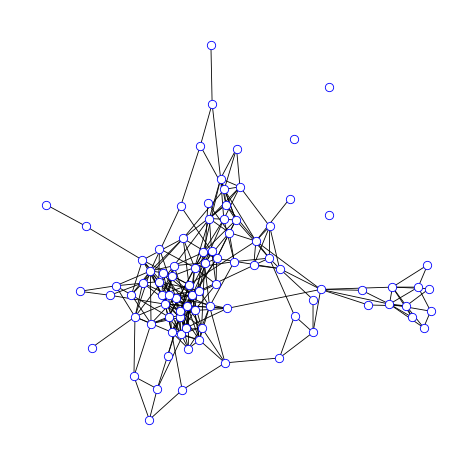

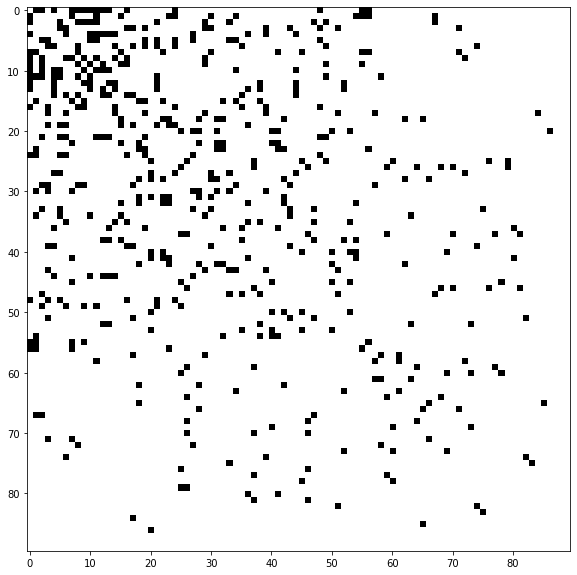

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


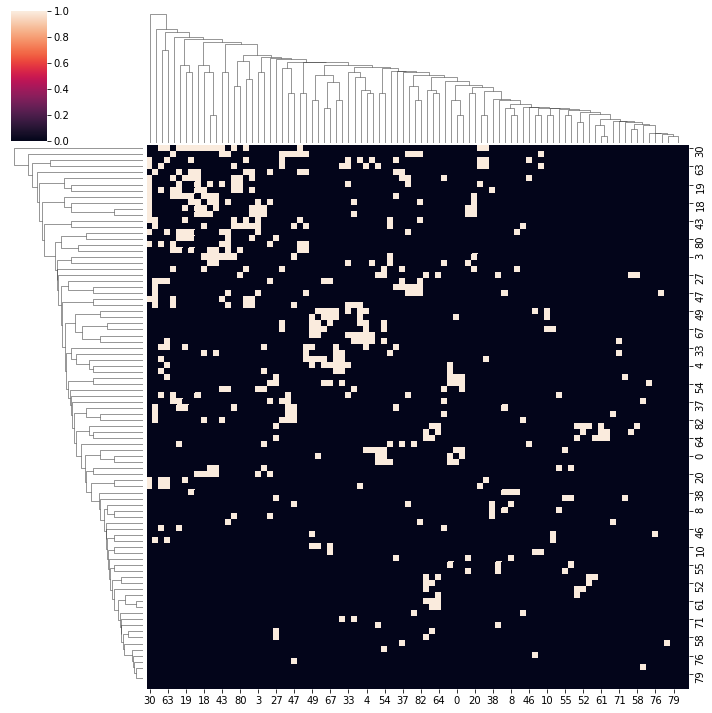

In [4]:
highschoolgraph = csv_to_graph("HighSchool")
print_graph(G=highschoolgraph)
plt.subplots(figsize=(10, 10))
plt.imshow(nx.to_numpy_array(highschoolgraph, nodelist=nodes_sorted_by_degree(highschoolgraph)), cmap='Greys', interpolation='none')
plt.show()
sns.clustermap(nx.to_numpy_array(highschoolgraph), metric="cityblock")

In [5]:
len(highschoolgraph)
print(np.sum(nx.to_numpy_array(highschoolgraph)))

538.0


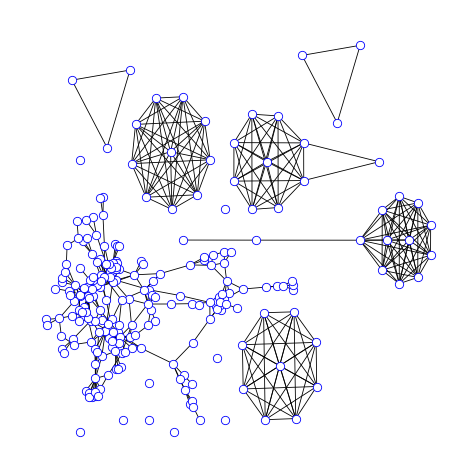

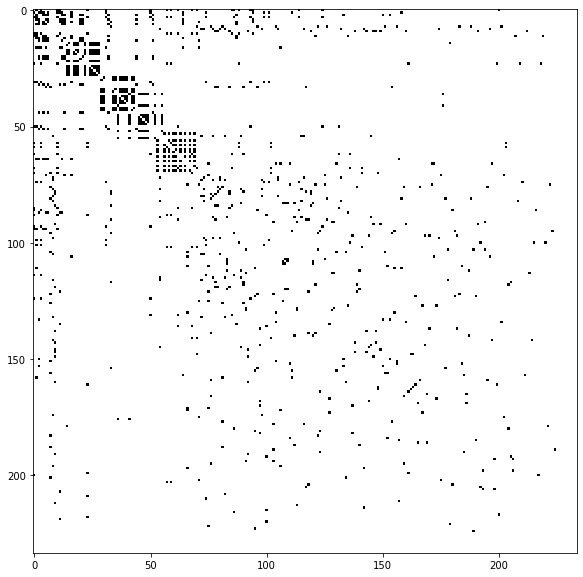

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


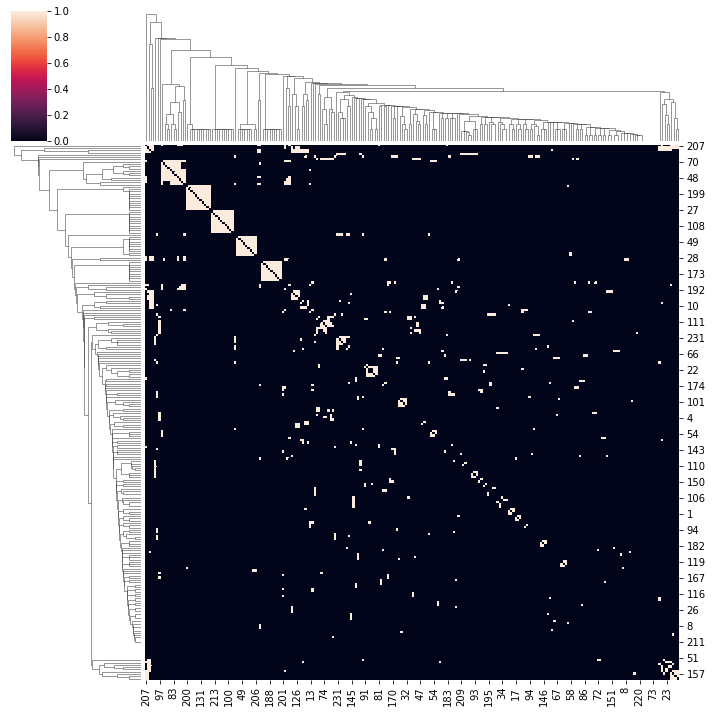

In [6]:
nipsgraph = csv_to_graph("NIPS")
print_graph(G=nipsgraph)
plt.subplots(figsize=(10, 10))
plt.imshow(nx.to_numpy_array(nipsgraph, nodelist=nodes_sorted_by_degree(nipsgraph)), cmap='Greys', interpolation='none')
plt.show()
sns.clustermap(nx.to_numpy_array(nipsgraph), metric="cityblock")

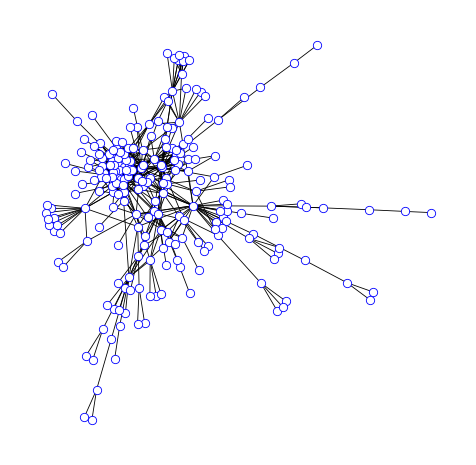

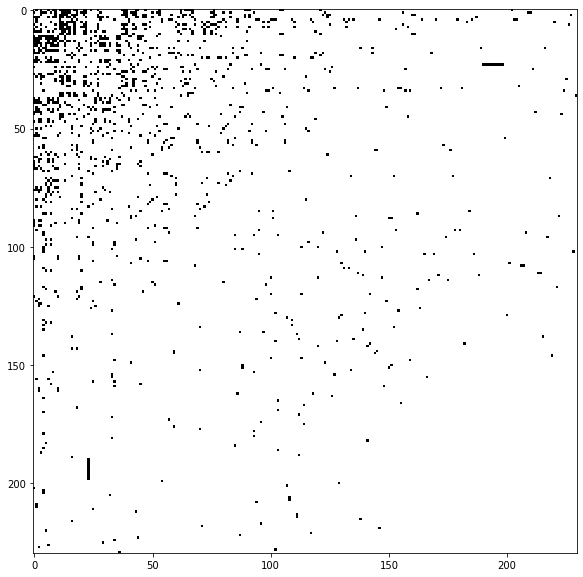

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


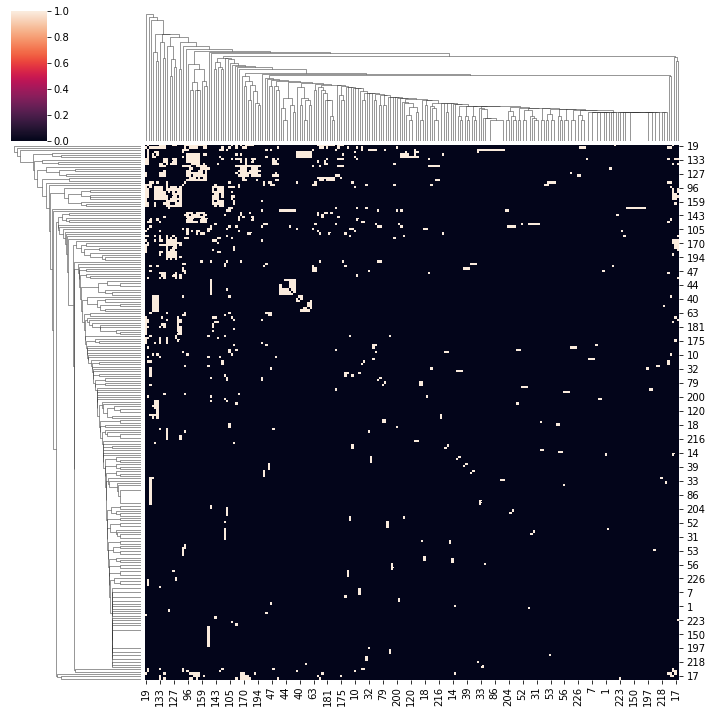

In [7]:
proteingraph = csv_to_graph("Protein")
print_graph(G=proteingraph)
plt.subplots(figsize=(10, 10))
plt.imshow(nx.to_numpy_array(proteingraph, nodelist=nodes_sorted_by_degree(proteingraph)), cmap='Greys', interpolation='none')
plt.show()
sns.clustermap(nx.to_numpy_array(proteingraph))